## Clinical Data Analysis with Mimic 3 Demo Database Using SQLITE and Jupiter Notebook 

For this tutorial I am going to query data from the Mimic 3 Demo Database. The Mimic 3 Demo Database is a subset of the original database in that it contians 100 of the original 40,000 patients.  This database contains deidentified health care data of patients from intensive care units at Beth Israel Deaconess Medical Center between 2001 and 2012[1].  The demo database is readily available via this link: https://physionet.org/content/mimiciii-demo/1.4/

For this tutorial I will using sqlite, python and jupyter notebook installed locally on a mac.

Part I involves learning how to set up SQL select statements to query all data as well as using data filtering mechanisms through the use of WHERE and IN.  In Part 2 I will expand the use of the select statement to build a multitable query and analyze patient temperature data. I will be using sql, sqlite and python pandas as well as matplotlib and seaborn as the main tools for this analysis.

## Part I

Import the required libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
%matplotlib inline

Now, I will first build the path to connect to the database and assign it to a variable which in this case is path.  Also this specific directory path is for a mac.  Modify the path accordingly for your local machine.  

In [85]:
path = "/Users/nicksazy/Desktop/mimic3demo.db"

Now I will query the database with a focus on the chartevents table.  This table has clinician charted data that includes measurements such as patient temperature, heart rate and blood pressure. Below I will describe step by step how to create this query.
    1. First use the path variable as a parameter to connect(). The result of this call will be assinged to the       
       variable conn.
    2. Now in the call to read_sql(), two parameters will be used.  The select statment enclosed in triple quotes 
       will be the first parameter and the second parameter will include the newly created conn variable assigned
       to con. 
    3. Lsstly, using the pandas dataframe method head() I will output the first 10 lines. *As a note if you were to          use df.head() without a number as a parameter, which is the default, head() will return 5 rows.

In [15]:
import pandas as pd
import sqlite3
path = "/Users/nicksazy/Desktop/mimic3demo.db"
conn = sql.connect(path)
df = pd.read_sql("""select * from chartevents""", con = conn)
df.head(10)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,None,None
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,None,None
5,5279026,40124,126179,279554.0,220180,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,81.0,81.0,mmHg,0.0,0.0,None,None
6,5279027,40124,126179,279554.0,220181,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,101.0,101.0,mmHg,0.0,0.0,None,None
7,5279028,40124,126179,279554.0,220046,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,120.0,120.0,bpm,0.0,0.0,None,None
8,5279029,40124,126179,279554.0,220047,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,50.0,50.0,bpm,0.0,0.0,None,None
9,5279030,40124,126179,279554.0,223751,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,170.0,170.0,mmHg,0.0,0.0,None,None


Below I will select all columns from the chartevents table but now will use the keyword where in order to filter the data so only the patient data associated with row_id is displayed.

In [16]:
df = pd.read_sql("""select * from chartevents where row_id = 5279021""", con = conn)
df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None


Below again I am going to filter the data so that I can get values on three patients, but this time I need to use the "in" keyword with "where". Here I will query patient data associated with the row_id's 5279021, 5279022 and 5279023.

In [17]:
df = pd.read_sql("""select * from chartevents where row_id in (5279021, 5279022, 5279023)""", con = conn)
df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None


## Part 2 

Now I need to query the d_items table to create a dataframe in order to find the label being used for patient temperature.  

In [73]:
query = """select * from d_items;"""
getlabels = pd.read_sql_query(query, conn)

Now that we have the getlabels dataframe lets use the pandas method unique() to see all of the values 
for the label column. First I will assign the results to the variable a.  Then will use the sorted method with the 
variable a as the first parameter and reverse=False as the second.  Reverse=False sets the data in descending order. 
Reverse=False sets it in ascending order.

In [88]:
getlabels['label'] = getlabels['label'].astype(str)
a = getlabels.label.unique()
print(sorted(a, reverse=False))


['#1 chest tube irrig.', '#11 Vent cap/ #16', '#11 vent cap/#14 sx', '#3 CT-POSTERIOR', '% Inspir. Time', '%cool mist', '(L) FEM ART', '(R) FEM ART', '(R) FEMORAL SHEATH', '(R) Fem drain bag', '(R) nephrostomy', '(R)Nephrostomy flush', '.25 NS +1:1 Heparin', '.25 NS+0.5:1 Heparin', '.25% Normal Saline', '.25NS flush', '.3% normal Saline', '.45 NS', '.45% Normal Saline', '.45%NS FLUSH', '.45%ns', '.45NS & 1 AMP BICARB', '.45NS + .5:1 Heparin', '.45NS + 1:1 Heparin', '.45NS BOLUS', '.45NS flush', '.45ns + 1 amp bicarb', '.45ns w/ 20kcl', '.5:1 NS REPLETION', '.5BM/.5Neocate 24 PG', '.5BM/.5Neocate 24 PO', '.9% NS flush', '.9% Normal Saline', '.9%NS w/30mml NaPhos', '.9NS + 0.5:1 heparin', '.9NS + 1:1 Heparin', '.9NS bolus', '.9NS flush', '0', '0.45% + 60 MEQ KCL', '0.45% Normal Saline', '0.45%NS +40meq kcl', '0.45%ns + 20 meq kcl', '0.45NSS', '0.5:1 U/O REPLETION', '0.9% Normal Saline', '0.9%NS with 40KCL', '02 ANALYZED', '02 Tubing Present', '1-10 ML 20% MUCOMYST', '1. Nausea and Vomit.

Now I am going to build a multi table query using an "inner join" which returns records that have matching values in all tables involved.  The tables included in this query include chartevents, d_items, icustays and admissions. The chartevents table which as explained previously houses the values for clinician charted temperature data.  D_items includes the labels used for clinician charted data.  The labels column has significance as I am going to use the specific label 'Temperature F'(F for Fahrenheit), found in the list above.  The icustays table contains data such as the location of where the patient is at such as MICU (Medical Intensive Care Unit).  

Another note to mention before running this query would be how the query is built.  In this select query we create an alias for each table such as "chartevents de" as can be seen below. Now instead of using chartevents.icustay_id to select the icustay_id column from chartevents we can use "de.icustay_id" instead.  

To join two tables together as part of an INNER JOIN you join each on their common column name.  As an example, to join both the chartevents and icustays tables together in this manner you use "INNER JOIN  ditems di ON de.itemid = di.itemid" where in this case their common column name is itemid.

I also use the WHERE keyword to filter the data by the patients temperature as well by discharge location such that only discharge location 'DEAD/EXPIRED' is excluded. 

Lastly, I will use "ORDER BY" in order to list the records in ascending order by charted time. 

In [92]:
query = """
SELECT de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0) as Number_Of Hours_In_The_ICU
  , di.label
  , de.valuenum
  , ie.first_careunit
  , ie.last_careunit
  , a.discharge_location
  , de.charttime
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join admissions a
ON de.subject_id = a.subject_id
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE di.label == "Temperature F" and a.discharge_location != 'DEAD/EXPIRED'
ORDER BY charttime;
"""
conn = sql.connect(path)
clinical_data = pd.read_sql_query(query,conn)
clinical_data

,icustay_id,Time_In_The_ICU,label,valuenum,first_careunit,last_careunit,discharge_location,charttime
0,256345.0,1.0,Temperature F,94.599998,MICU,MICU,SNF,2107-01-05 01:15:00
1,256345.0,1.0,Temperature F,94.599998,MICU,MICU,SNF,2107-01-05 01:15:00
2,256345.0,1.0,Temperature F,94.599998,MICU,MICU,SNF,2107-01-05 01:15:00
3,256345.0,5.0,Temperature F,97.000000,MICU,MICU,SNF,2107-01-05 05:00:00
4,256345.0,5.0,Temperature F,97.000000,MICU,MICU,SNF,2107-01-05 05:00:00
...,...,...,...,...,...,...,...,...
1197,271544.0,525.0,Temperature F,101.099998,TSICU,TSICU,REHAB/DISTINCT PART HOSP,2198-07-20 03:00:00
1198,271544.0,527.0,Temperature F,101.500000,TSICU,TSICU,REHAB/DISTINCT PART HOSP,2198-07-20 05:00:00
1199,271544.0,529.0,Temperature F,100.599998,TSICU,TSICU,REHAB/DISTINCT PART HOSP,2198-07-20 07:00:00
1200,271544.0,531.0,Temperature F,99.599998,TSICU,TSICU,REHAB/DISTINCT PART HOSP,2198-07-20 09:00:00


Now I will plot the temperature over time for the patients' in icu so we can visualize the temperature trends from admission until the end of the icu stay.  Here I am going to use seaborn to visualize the data.
1. First I will import seaborn and give it the alias sns
2. I will set the font to 2 so it can be easily read.
3. I will use relplot and in the call and use getlabels as the parameter for data, number of hour in the icu from the dataframe for x as well as the temperature data as valuenum from the dataframe for y.
4. I am going to set the height of the graph to 6.

Text(0.5, 1, 'Patients temperature in Farenheit from admission over time during stay in the ICU.')

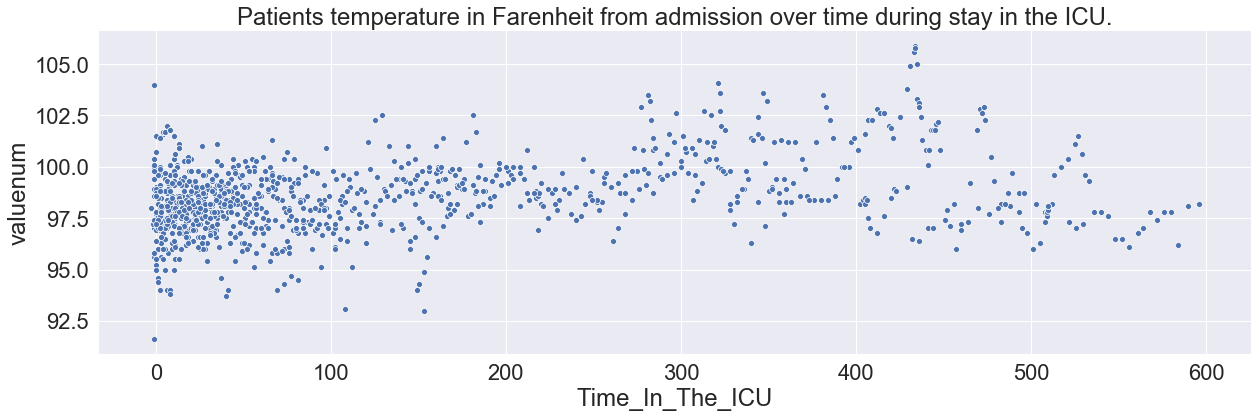

In [94]:
import seaborn as sns
sns.set(font_scale=2)
sns.relplot(data=clinical_data, x="Number_Of Hours_In_The_ICU", y="valuenum", height=6, aspect=3)
plt.title('Patients temperature in Farenheit from admission over time during stay in the ICU.')

Now we can see the trends of patients' temperaturature readings over time.  The temperatures range from 96 to just over 104 degrees Fahrenheit at admission and then over the length of the stay rise slightly then stablize around 98 degress toward the end of the stay.

# References

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.